Author: Yanzheng(Dexter) Wu
Usage: Preprocessing & formatting, Group 1 Visualization Part.

## 1. Parsing Pythia STD.

We first use the parsing.py to filter out the groups and trace information from the other log outputs. 

pythia_logs_full is the original std output from running VAIF in Pythia;

The output from the parsing.py is a json file which the key is the group number, and the values are the two hypothesis results(in nodes). 

In [23]:
import json
import os

os.system("python parsing.py")

file = open("parsed.json")
groups = json.load(file)

print(type(groups))
groups["Group_2"]

parsing done, writing to json.
write done.
<class 'dict'>


['http://ctl:3030: NodeStats { receive_bytes_per_sec: 4016, transmit_bytes_per_sec: 611, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 2.29, load_avg_5_min: 3.87, tasks_runnable: 2, trace_input_kbps: 0.09, agent_cpu_time: 0.0, trace_size: 39655842 }',
 'http://cp-1:3030: NodeStats { receive_bytes_per_sec: 3630, transmit_bytes_per_sec: 457, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 0.0, load_avg_5_min: 0.0, tasks_runnable: 2, trace_input_kbps: 0.0, agent_cpu_time: 0.0, trace_size: 22406304 }']

## 2. Constructing graph based on the NodeStats. 


start building graph...
Done.


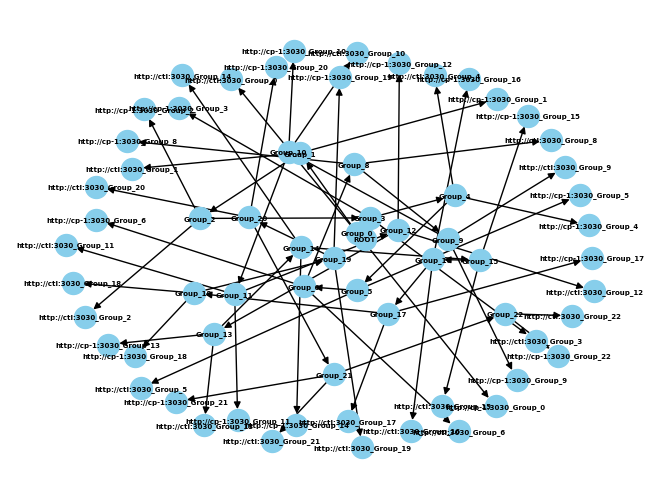

{'ROOT': {}, 'Group_0': {}, 'http://ctl:3030_Group_0': {'label': ' { receive_bytes_per_sec: 3270731, transmit_bytes_per_sec: 1958, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 3.66, load_avg_5_min: 4.31, tasks_runnable: 3, trace_input_kbps: 4.68, agent_cpu_time: 0.00008981959093592014, trace_size: 39655842 }'}, 'http://cp-1:3030_Group_0': {'label': ' { receive_bytes_per_sec: 3285880, transmit_bytes_per_sec: 1081, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 0.0, load_avg_5_min: 0.0, tasks_runnable: 2, trace_input_kbps: 0.0, agent_cpu_time: 0.00003773015393902807, trace_size: 22406304 }'}, 'Group_1': {}, 'http://ctl:3030_Group_1': {'label': ' { receive_bytes_per_sec: 4445, transmit_bytes_per_sec: 710, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 3.0, load_avg_5_min: 4.11, tasks_runnable: 3, trace_input_kbps: 0.09, agent_cpu_time: 0.0, trace_size: 39655842 }'}, 'http://cp-1:3030_Group_1': {'label': ' { receive_bytes_per_se

In [24]:
import os

os.environ['DATA'] = json.dumps(groups)
%run htree.py

## PS. Simulating the HForest constuction

In [36]:
batch0, batch1, batch2, batch3, batch4 = {}, {}, {}, {}, {}

flag0, flag1, flag2, flag3 = True, True, True, True

for idx, (key, value) in enumerate(groups.items()):
    if idx == 0:
        batch0[key] = value
    if 1 <= idx < 5:
        if flag0:
            flag0 = False
            batch1.update(batch0)
            batch1[key] = value
            continue
        batch1[key] = value
    if 5 <= idx < 10:
        if flag1:
            flag1 = False
            batch2.update(batch1)
            batch2[key] = value
            continue
        batch2[key] = value
    if 10 <= idx < 15:
        if flag2:
            flag2 = False
            batch3.update(batch2)
            batch3[key] = value
            continue
        batch3[key] = value
    if idx >= 15: 
        if flag3:
            flag3 = False
            batch4.update(batch3)
            batch4[key] = value
            continue
        batch4[key] = value

print(len(batch4))
print(len(batch3))
print(len(batch2))
print(len(batch1))
print(len(batch0))

22
15
10
5
1


Current number of forest = 1.
start building graph...
Done.


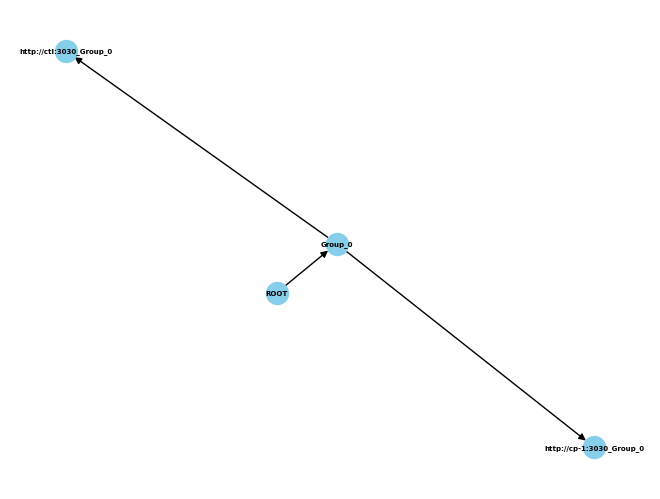

{'ROOT': {}, 'Group_0': {}, 'http://ctl:3030_Group_0': {'label': ' { receive_bytes_per_sec: 3270731, transmit_bytes_per_sec: 1958, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 3.66, load_avg_5_min: 4.31, tasks_runnable: 3, trace_input_kbps: 4.68, agent_cpu_time: 0.00008981959093592014, trace_size: 39655842 }'}, 'http://cp-1:3030_Group_0': {'label': ' { receive_bytes_per_sec: 3285880, transmit_bytes_per_sec: 1081, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 0.0, load_avg_5_min: 0.0, tasks_runnable: 2, trace_input_kbps: 0.0, agent_cpu_time: 0.00003773015393902807, trace_size: 22406304 }'}}
Current number of forest = 5.
start building graph...
Done.


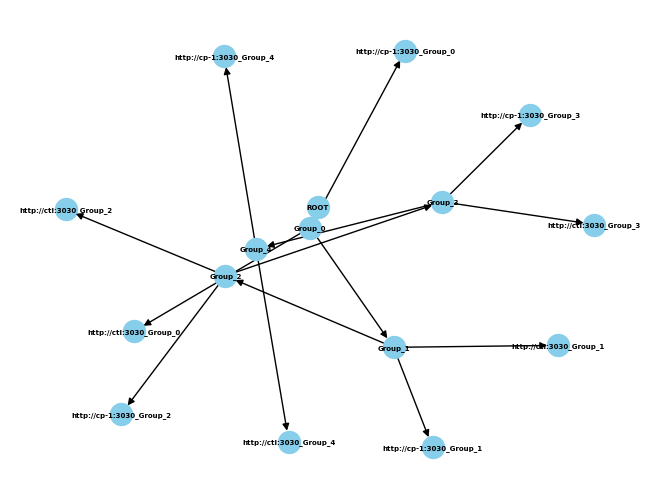

{'ROOT': {}, 'Group_0': {}, 'http://ctl:3030_Group_0': {'label': ' { receive_bytes_per_sec: 3270731, transmit_bytes_per_sec: 1958, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 3.66, load_avg_5_min: 4.31, tasks_runnable: 3, trace_input_kbps: 4.68, agent_cpu_time: 0.00008981959093592014, trace_size: 39655842 }'}, 'http://cp-1:3030_Group_0': {'label': ' { receive_bytes_per_sec: 3285880, transmit_bytes_per_sec: 1081, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 0.0, load_avg_5_min: 0.0, tasks_runnable: 2, trace_input_kbps: 0.0, agent_cpu_time: 0.00003773015393902807, trace_size: 22406304 }'}, 'Group_1': {}, 'http://ctl:3030_Group_1': {'label': ' { receive_bytes_per_sec: 4445, transmit_bytes_per_sec: 710, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 3.0, load_avg_5_min: 4.11, tasks_runnable: 3, trace_input_kbps: 0.09, agent_cpu_time: 0.0, trace_size: 39655842 }'}, 'http://cp-1:3030_Group_1': {'label': ' { receive_bytes_per_se

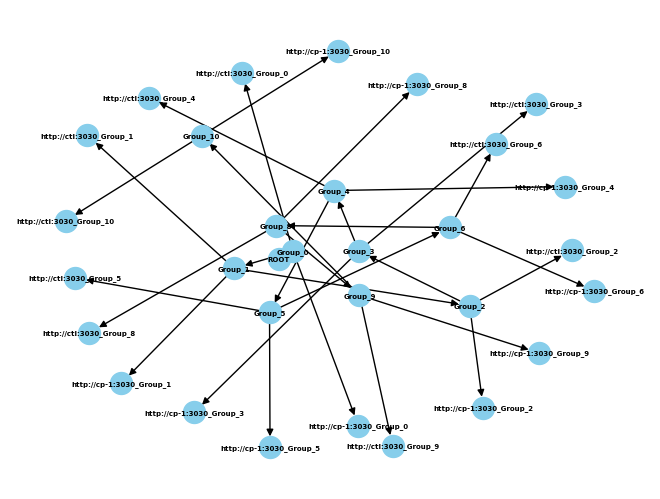

{'ROOT': {}, 'Group_0': {}, 'http://ctl:3030_Group_0': {'label': ' { receive_bytes_per_sec: 3270731, transmit_bytes_per_sec: 1958, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 3.66, load_avg_5_min: 4.31, tasks_runnable: 3, trace_input_kbps: 4.68, agent_cpu_time: 0.00008981959093592014, trace_size: 39655842 }'}, 'http://cp-1:3030_Group_0': {'label': ' { receive_bytes_per_sec: 3285880, transmit_bytes_per_sec: 1081, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 0.0, load_avg_5_min: 0.0, tasks_runnable: 2, trace_input_kbps: 0.0, agent_cpu_time: 0.00003773015393902807, trace_size: 22406304 }'}, 'Group_1': {}, 'http://ctl:3030_Group_1': {'label': ' { receive_bytes_per_sec: 4445, transmit_bytes_per_sec: 710, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 3.0, load_avg_5_min: 4.11, tasks_runnable: 3, trace_input_kbps: 0.09, agent_cpu_time: 0.0, trace_size: 39655842 }'}, 'http://cp-1:3030_Group_1': {'label': ' { receive_bytes_per_se

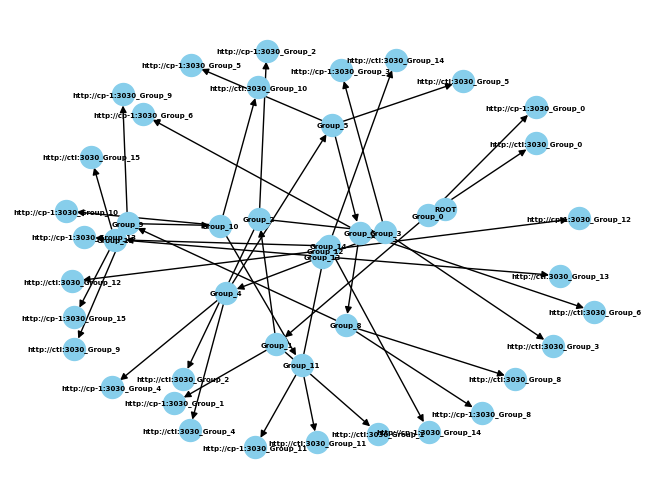

{'ROOT': {}, 'Group_0': {}, 'http://ctl:3030_Group_0': {'label': ' { receive_bytes_per_sec: 3270731, transmit_bytes_per_sec: 1958, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 3.66, load_avg_5_min: 4.31, tasks_runnable: 3, trace_input_kbps: 4.68, agent_cpu_time: 0.00008981959093592014, trace_size: 39655842 }'}, 'http://cp-1:3030_Group_0': {'label': ' { receive_bytes_per_sec: 3285880, transmit_bytes_per_sec: 1081, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 0.0, load_avg_5_min: 0.0, tasks_runnable: 2, trace_input_kbps: 0.0, agent_cpu_time: 0.00003773015393902807, trace_size: 22406304 }'}, 'Group_1': {}, 'http://ctl:3030_Group_1': {'label': ' { receive_bytes_per_sec: 4445, transmit_bytes_per_sec: 710, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 3.0, load_avg_5_min: 4.11, tasks_runnable: 3, trace_input_kbps: 0.09, agent_cpu_time: 0.0, trace_size: 39655842 }'}, 'http://cp-1:3030_Group_1': {'label': ' { receive_bytes_per_se

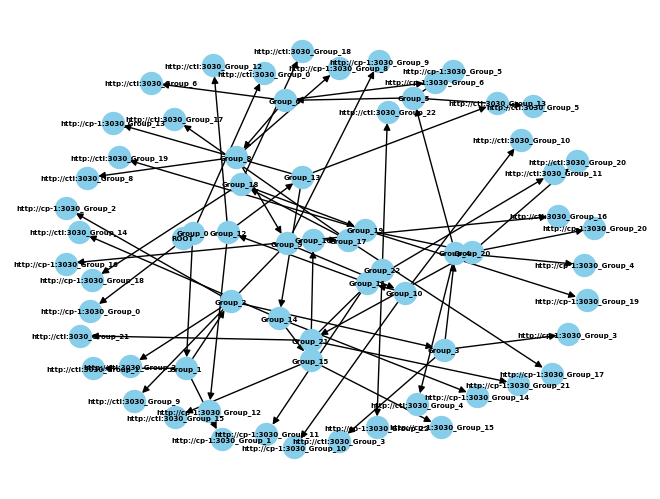

{'ROOT': {}, 'Group_0': {}, 'http://ctl:3030_Group_0': {'label': ' { receive_bytes_per_sec: 3270731, transmit_bytes_per_sec: 1958, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 3.66, load_avg_5_min: 4.31, tasks_runnable: 3, trace_input_kbps: 4.68, agent_cpu_time: 0.00008981959093592014, trace_size: 39655842 }'}, 'http://cp-1:3030_Group_0': {'label': ' { receive_bytes_per_sec: 3285880, transmit_bytes_per_sec: 1081, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 0.0, load_avg_5_min: 0.0, tasks_runnable: 2, trace_input_kbps: 0.0, agent_cpu_time: 0.00003773015393902807, trace_size: 22406304 }'}, 'Group_1': {}, 'http://ctl:3030_Group_1': {'label': ' { receive_bytes_per_sec: 4445, transmit_bytes_per_sec: 710, receive_drop_per_sec: 0, transmit_drop_per_sec: 0, load_avg_1_min: 3.0, load_avg_5_min: 4.11, tasks_runnable: 3, trace_input_kbps: 0.09, agent_cpu_time: 0.0, trace_size: 39655842 }'}, 'http://cp-1:3030_Group_1': {'label': ' { receive_bytes_per_se

In [37]:
pipeline = [batch0, batch1, batch2, batch3, batch4]

for batch in pipeline:
    os.environ['DATA'] = json.dumps(batch)
    print(f"Current number of forest = {len(batch)}.")
    %run htree.py